This notebook demonstrates how the safemotions package can be used to generate torque-limited and collision-free robot trajectories without exceeding limits on the position, velocity, acceleration and jerk of each robot joint.
Note: Colab does not provide a display server, however, it is possible to render videos of the generated movements. 
When running the package on your local machine, you can add the command line argument "--use_gui" for instantaneous visualization. 

Note: The following examples generate random movements. This corresponds to the behavior of a neural network at the beginning of the training phase.
A [second notebook](https://colab.research.google.com/github/translearn/notebooks/blob/main/safemotions_trained_networks_demo.ipynb) is provided to demonstrate the performance of pretrained networks.   


In [1]:
# First step: install the safemotions package via pip
! pip install pybullet==3.1.6
! pip install safemotions
! pip install gputil
%matplotlib inline
# Use a renderer with hardware acceleration provided that a GPU is available. 
import GPUtil
renderer = "egl" if len(GPUtil.getGPUs()) > 0 else "cpu"
if renderer == "cpu":
  print("Using CPU renderer.")
else:
  print("Using GPU renderer.")

     |████████████████████████████████| 89.3MB 51kB/s 
     |████████████████████████████████| 6.0MB 7.1MB/s 
     |████████████████████████████████| 245kB 49.8MB/s 
  Created wheel for gputil: filename=GPUtil-1.4.0-cp37-none-any.whl size=7411 sha256=5bd40bfddba51ca449935d8a1859fff9a5c6829a6ed198c069a5635dfa482837
  Stored in directory: /root/.cache/pip/wheels/3d/77/07/80562de4bb0786e5ea186911a2c831fdd0018bda69beab71fd
Successfully built gputil
Using GPU renderer.


Run the following code to render a video of a single robot that performs random collision-free motions. <br>
Note: Since the virtual walls around the robot are transparent, only the GPU-based renderer can be used for this example. <br>
When a robot link flashes  <font color='#ff5400'>orange</font>, an alternative safe behavior is executed to avoid a torque limit violation. <font color='#75052d'>Red</font> and <font color='#0000aa'>blue</font> flashing indicates that an alternative safe behavior is performed to prevent a collision with another robot link and a static obstacle, respectively. 



INFO:root:Pos upper limits: [2.93205973 2.0593951  2.93205973 2.0593951  2.93205973 2.0593951
 3.01932619]
INFO:root:Pos lower limits: [-2.93205973 -2.0593951  -2.93205973 -2.0593951  -2.93205973 -2.0593951
 -3.01932619]
INFO:root:Vel limits: [1.71042267 1.71042267 1.74532925 2.26892803 2.44346095 3.14159265
 3.14159265]
INFO:root:Acc limits: [15.   7.5 10.  12.5 15.  20.  20. ]
INFO:root:Jerk limits: [300. 150. 200. 250. 300. 400. 400.]
INFO:root:Torque limits: [105.6 105.6  66.   66.   66.   24.   24. ]
INFO:root:Trajectory time step: 0.1
INFO:root:Observation size: 35
INFO:root:Joint 1 (min/max) Actual Torque: -0.357857624020107 / 0.4658952043652578; Jerk: -0.7446218943814356 / 0.9591475558876259; Acc: -0.9686787417842172 / 0.9977427866939883; Vel: -0.9362288130437655 / 0.9038234534005327; Pos: 0.21402660017773023 / 0.5935211840641359
INFO:root:Joint 2 (min/max) Actual Torque: -0.9526113171663376 / 0.8841409806044831; Jerk: -0.9155420939396591 / 0.8106834497629045; Acc: -0.963766833

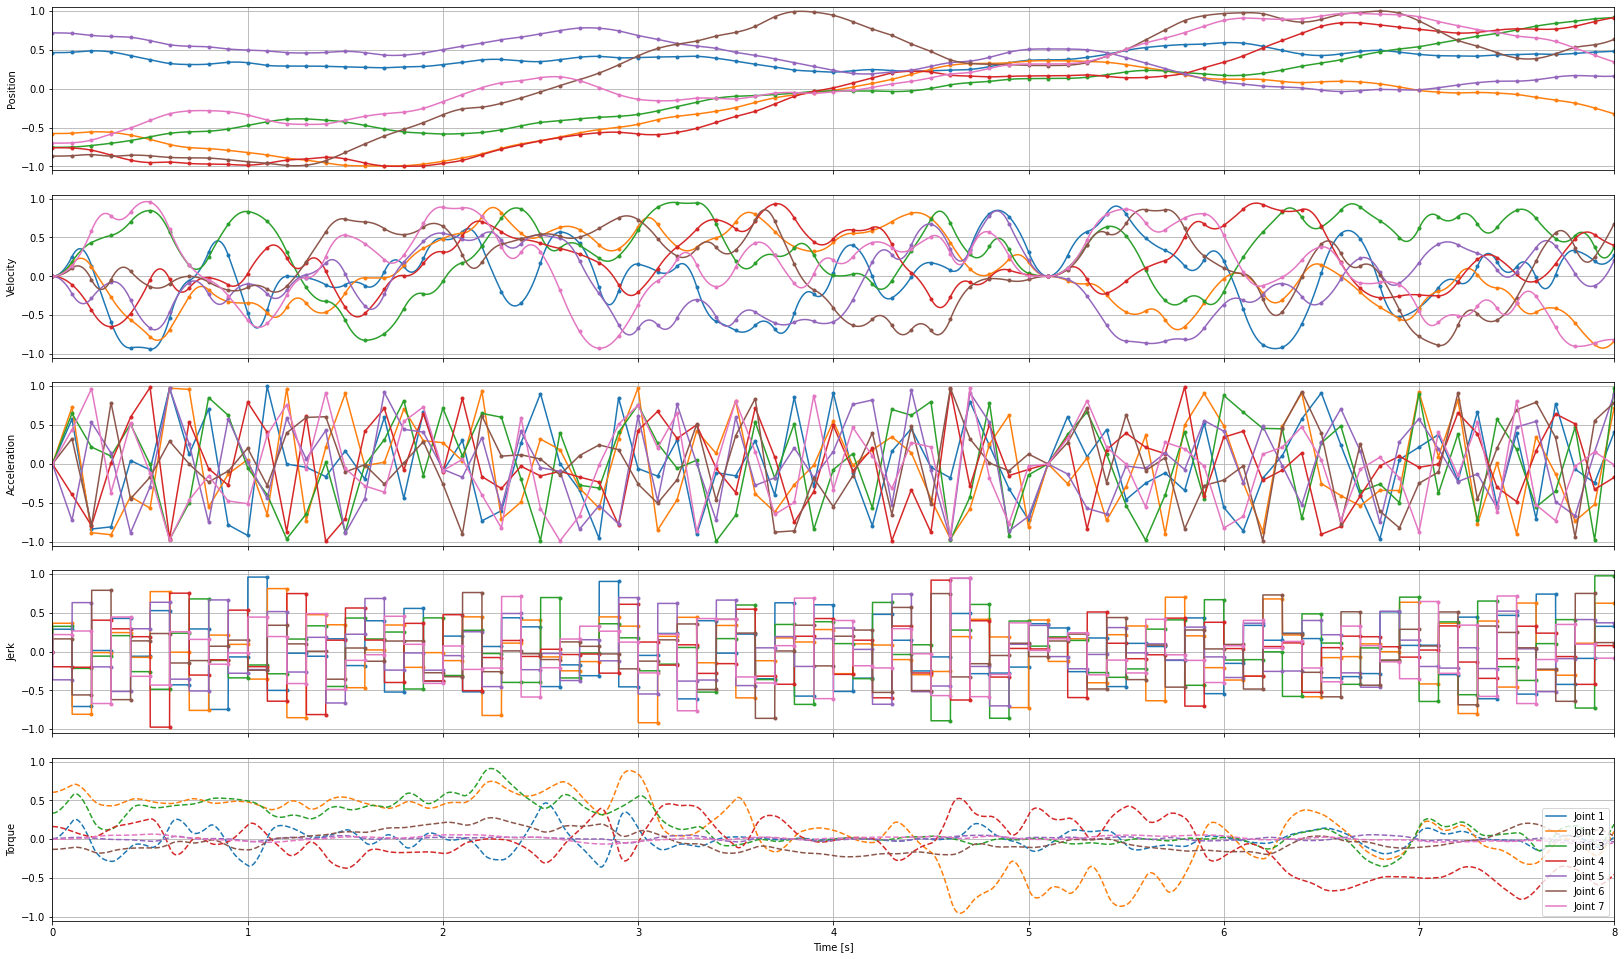

INFO:root:Last episode took 15.763979196548462 seconds. Trajectory duration: 8.0 seconds.
INFO:root:Reward: -16.82796265617774


In [2]:
import os, safemotions
from IPython.display import HTML, display
from base64 import b64encode
package_dir = os.path.dirname(safemotions.__file__)
video_height = 720
video_frame_rate = 24
video_width = int(16/9 * video_height)
random_agent = os.path.join(package_dir, "random_agent.py")
if renderer == "cpu":
  print("This example requires a GPU-based renderer as the walls around the robot are transparent. Unfortunately, transparency is not supported by the cpu renderer. Try to run the other examples instead.")
else:
  %run -G "$random_agent" --check_braking_trajectory_torque_limits --robot_scene=0 --online_trajectory_duration=8.0 --torque_limit_factor=0.6 --plot_trajectory --episodes=1 --render --renderer=$renderer --video_frame_rate=$video_frame_rate --camera_angle=8 --video_height=$video_height --video_dir="/content"
  video_filename = os.path.join("/content", "episode_1.mp4")
  video_file = open(video_filename,'rb').read()
  url = "data:video/mp4;base64," + b64encode(video_file).decode()
  display(HTML("""<video width="%s" controls><source src="%s" type="video/mp4"></video>""" % (video_width, url)))

For a demonstration scenario with two robots run the following below: 

INFO:root:Pos upper limits: [2.93205973 2.0593951  2.93205973 2.0593951  2.93205973 2.0593951
 3.01932619 2.93205973 2.0593951  2.93205973 2.0593951  2.93205973
 2.0593951  3.01932619]
INFO:root:Pos lower limits: [-2.93205973 -2.0593951  -2.93205973 -2.0593951  -2.93205973 -2.0593951
 -3.01932619 -2.93205973 -2.0593951  -2.93205973 -2.0593951  -2.93205973
 -2.0593951  -3.01932619]
INFO:root:Vel limits: [1.71042267 1.71042267 1.74532925 2.26892803 2.44346095 3.14159265
 3.14159265 1.71042267 1.71042267 1.74532925 2.26892803 2.44346095
 3.14159265 3.14159265]
INFO:root:Acc limits: [15.   7.5 10.  12.5 15.  20.  20.  15.   7.5 10.  12.5 15.  20.  20. ]
INFO:root:Jerk limits: [300. 150. 200. 250. 300. 400. 400. 300. 150. 200. 250. 300. 400. 400.]
INFO:root:Torque limits: [176. 176. 110. 110. 110.  40.  40. 176. 176. 110. 110. 110.  40.  40.]
INFO:root:Trajectory time step: 0.1
INFO:root:Observation size: 70
INFO:root:Joint 1 (min/max) Actual Torque: -0.2675104162763038 / 0.3916220195422837

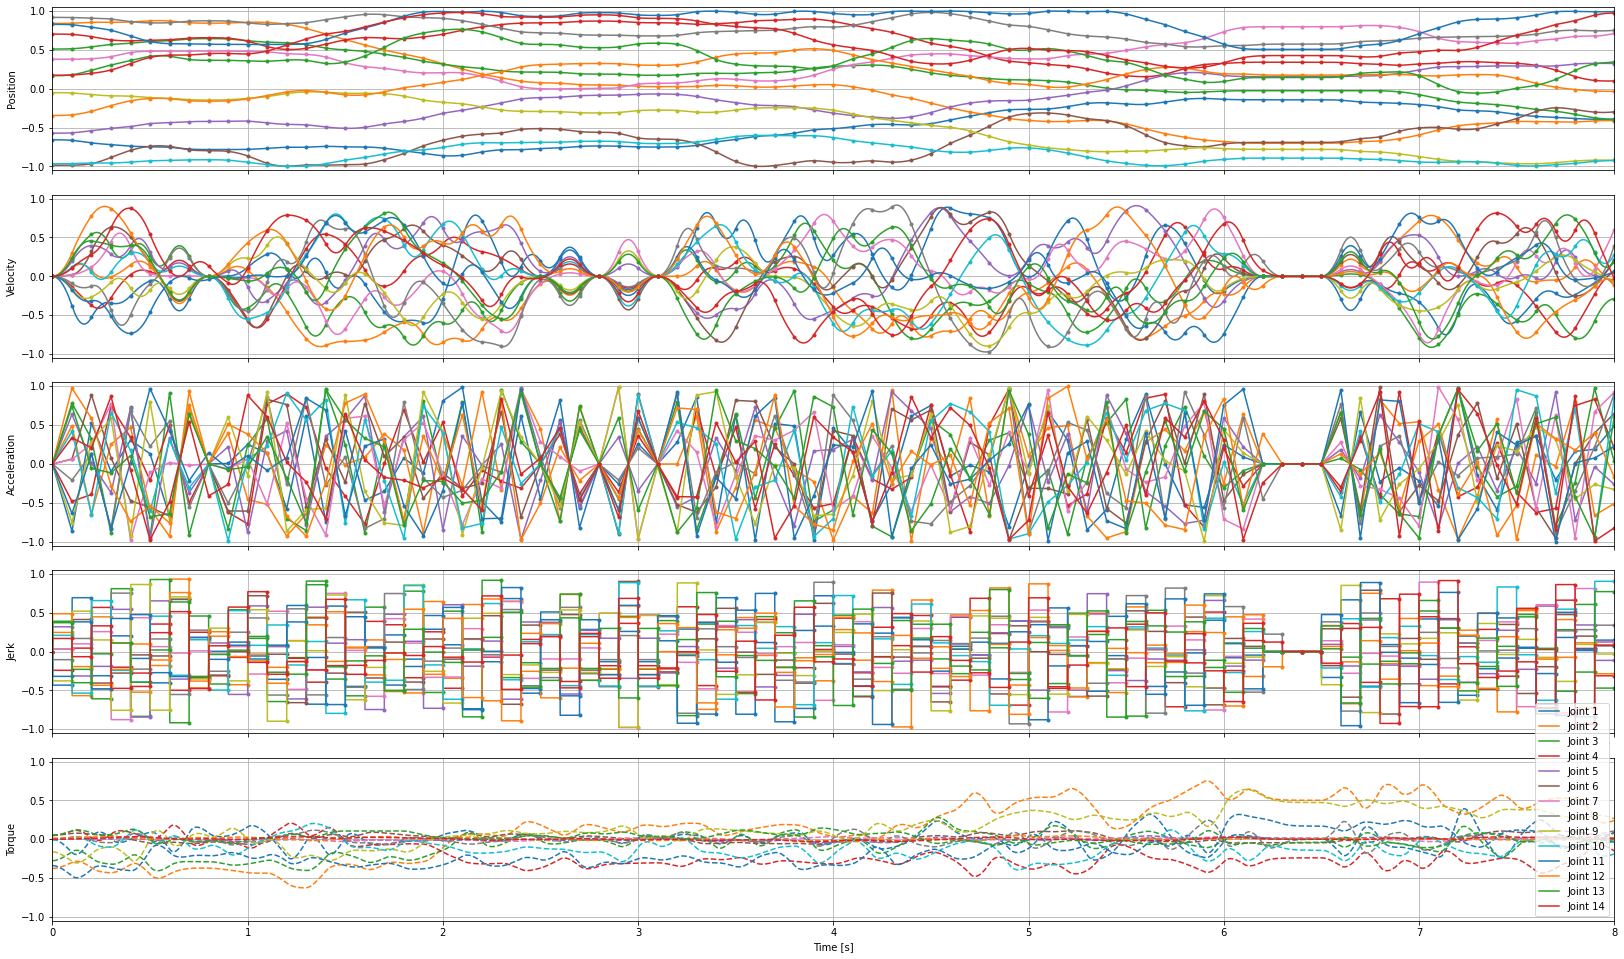

INFO:root:Last episode took 19.896567344665527 seconds. Trajectory duration: 8.0 seconds.
INFO:root:Reward: -21.66167164069899


In [4]:
import os, safemotions
from IPython.display import HTML
from base64 import b64encode
package_dir = os.path.dirname(safemotions.__file__)
random_agent = os.path.join(package_dir, "random_agent.py")
if renderer == "cpu":
  video_height = 360
  video_frame_rate = 15
else:
  video_height = 720
  video_frame_rate = 24
video_width = int(16/9 * video_height)

%run -G "$random_agent" --check_braking_trajectory_torque_limits --robot_scene=1 --online_trajectory_duration=8.0 --plot_trajectory --episodes=1 --render --renderer=$renderer --video_frame_rate=$video_frame_rate --camera_angle=8 --video_height=$video_height --video_dir="/content"
video_filename = os.path.join("/content", "episode_1.mp4")
video_file = open(video_filename,'rb').read()
url = "data:video/mp4;base64," + b64encode(video_file).decode()
HTML("""<video width="%s" controls><source src="%s" type="video/mp4"></video>""" % (video_width, url))

Finally, collision-free trajectories for three robots can be generated by running the following cell:

INFO:root:Pos upper limits: [2.93205973 2.0593951  2.93205973 2.0593951  2.93205973 2.0593951
 3.01932619 2.93205973 2.0593951  2.93205973 2.0593951  2.93205973
 2.0593951  3.01932619 2.93205973 2.0593951  2.93205973 2.0593951
 2.93205973 2.0593951  3.01932619]
INFO:root:Pos lower limits: [-2.93205973 -2.0593951  -2.93205973 -2.0593951  -2.93205973 -2.0593951
 -3.01932619 -2.93205973 -2.0593951  -2.93205973 -2.0593951  -2.93205973
 -2.0593951  -3.01932619 -2.93205973 -2.0593951  -2.93205973 -2.0593951
 -2.93205973 -2.0593951  -3.01932619]
INFO:root:Vel limits: [1.71042267 1.71042267 1.74532925 2.26892803 2.44346095 3.14159265
 3.14159265 1.71042267 1.71042267 1.74532925 2.26892803 2.44346095
 3.14159265 3.14159265 1.71042267 1.71042267 1.74532925 2.26892803
 2.44346095 3.14159265 3.14159265]
INFO:root:Acc limits: [15.   7.5 10.  12.5 15.  20.  20.  15.   7.5 10.  12.5 15.  20.  20.
 15.   7.5 10.  12.5 15.  20.  20. ]
INFO:root:Jerk limits: [300. 150. 200. 250. 300. 400. 400. 300. 150.

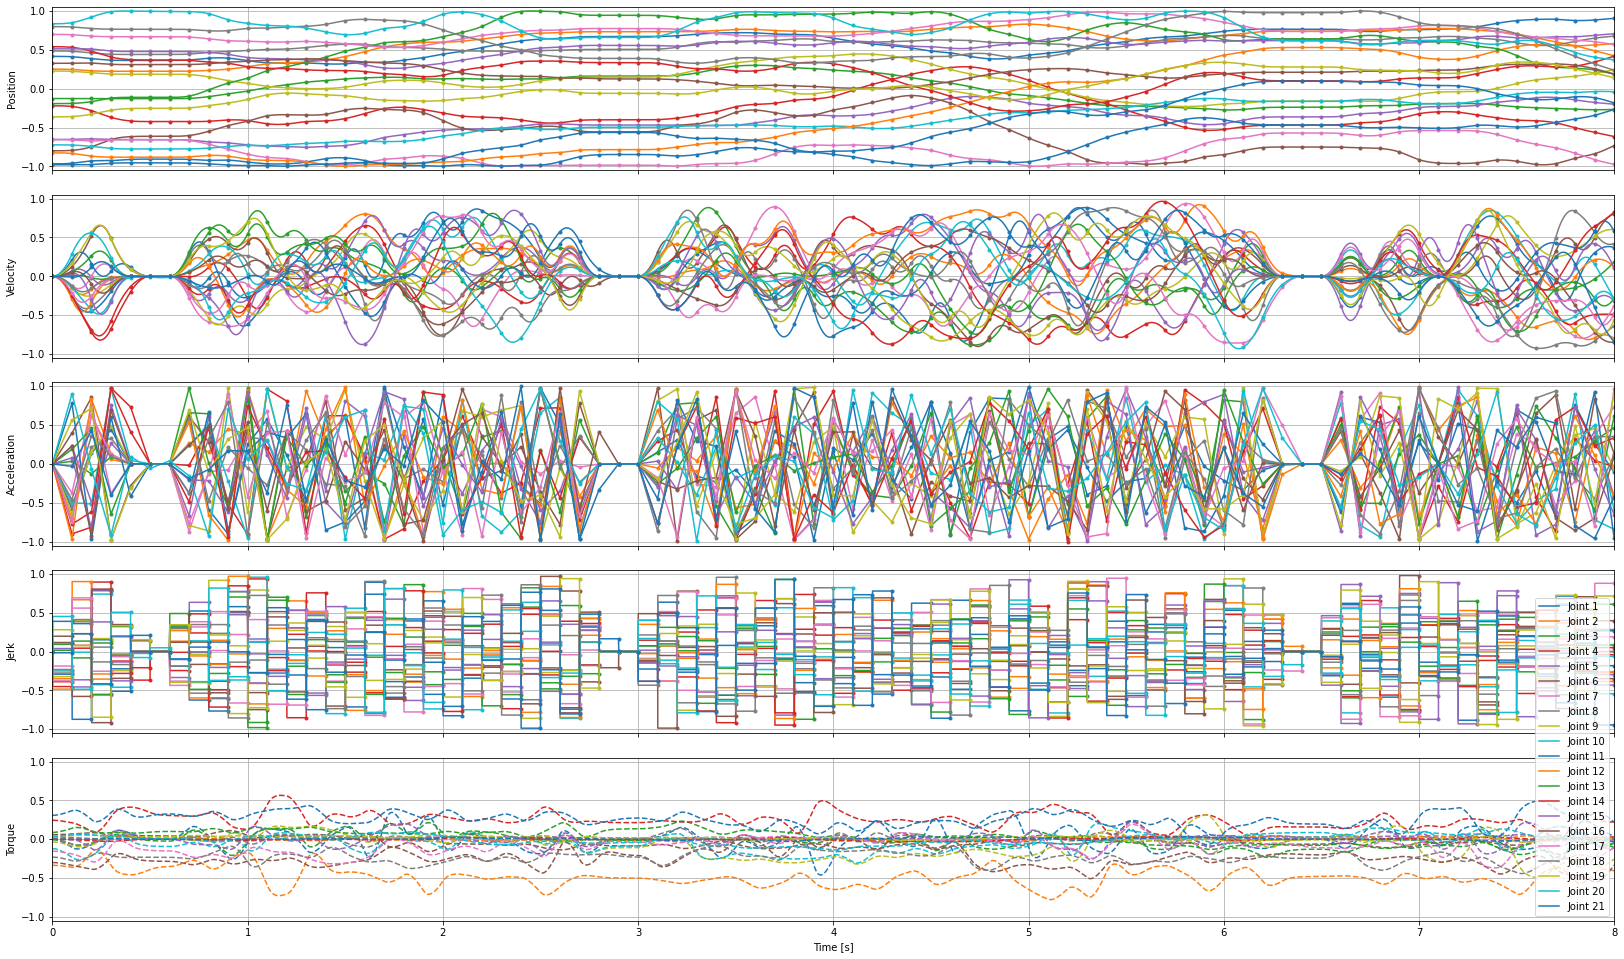

INFO:root:Last episode took 26.58719539642334 seconds. Trajectory duration: 8.0 seconds.
INFO:root:Reward: -37.70798653623741


In [5]:
import os, safemotions
from IPython.display import HTML
from base64 import b64encode
package_dir = os.path.dirname(safemotions.__file__)
random_agent = os.path.join(package_dir, "random_agent.py")
if renderer == "cpu":
  video_height = 360
  video_frame_rate = 15
else:
  video_height = 720
  video_frame_rate = 24
video_width = int(16/9 * video_height)

%run -G "$random_agent" --check_braking_trajectory_torque_limits --robot_scene=2 --online_trajectory_duration=8.0 --plot_trajectory --episodes=1 --render --renderer=$renderer --video_frame_rate=$video_frame_rate --camera_angle=8 --video_height=$video_height --video_dir="/content"
video_filename = os.path.join("/content", "episode_1.mp4")
video_file = open(video_filename,'rb').read()
url = "data:video/mp4;base64," + b64encode(video_file).decode()
HTML("""<video width="%s" controls><source src="%s" type="video/mp4"></video>""" % (video_width, url))